# Assignment 5

In this assignment, you will work with spatial data in Python. You will bring geographic
context into an initial exploratory data analysis by associating each trip start and trip end
in the Citi Bike trips dataset with the New York City Borough which contains it.

In [27]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import geojson
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from shapely.geometry import Point

1. You can find the dataset at: info615/data/citibike_sample.csv.zip. Read this CSV
into a DataFrame called df and convert any timestamp columns into DateTime types.

In [3]:
df = pd.read_csv("data/citibike_sample.csv.zip")

In [4]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

2. In this problem, you will use the spatial coordinates contained within df to create two
new GeoDataFrames. Each row in df is an individual Citi Bike trip, containing latitude
and longitude coordinates for both the start location and the end location of that trip.
These coordinaters are contained in the columns titled: ‘start station latitude’, ‘start station longitude’, ‘end station latitude’, and ‘end station longitude’.

a) Create a GeoDataFrame called trip_starts that is based on df with an additional
geometry column representing the Point geometries for each trip start location. Since
we are working with longitude and latitude coordinates, set the CRS to 4326.

In [290]:
geoms = []

for i, row in df.iterrows():
    lat = row['start station latitude']
    lon = row['start station longitude']
    point = Point(lon, lat)
    geoms.append(point)

In [291]:
trip_starts = gpd.GeoDataFrame(df, geometry=geoms, crs=4326)
trip_starts.crs = 4326
trip_starts = trip_starts.to_crs(4326)

In [292]:
trip_starts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [293]:
trip_starts.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'tripduration_minutes', 'starttime_dayname',
       'stoptime_dayname', 'starttime_hour', 'stoptime_hour', 'age',
       'distance_miles', 'geometry'],
      dtype='object')

b) Create a second GeoDataFrame called trip_ends that is based on df with an additional
geometry column representing the Point geometries for each trip end location. Since
we are working with longitude and latitude coordinates, set the CRS to 4326.

In [294]:
geoms = []

for i, row in df.iterrows():
    lat = row['end station latitude']
    lon = row['end station longitude']
    point = Point(lon, lat)
    geoms.append(point)

In [295]:
trip_ends = gpd.GeoDataFrame(df, geometry=geoms, crs=4326)
trip_ends.crs = 4326
trip_ends = trip_ends.to_crs(4326)

In [296]:
trip_ends.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

c) Plot a sample of 10,000 trip_starts. Set a small alpha value in order to get a sense
of densely populated areas with lots of overlapping points. Use Contextily to add a
base map of your choice.

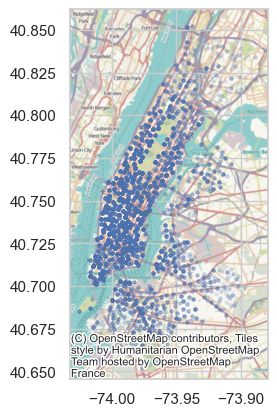

In [297]:
ax = trip_starts.sample(10000).plot(alpha=0.1, markersize=5, legend=True)
cx.add_basemap(ax, crs = trip_starts.crs)

d) Plot a sample of 10,000 trip_ends. Set a small alpha value in order to get a sense of
densely populated areas with lots of overlapping points. Use Contextily to add a base
map of your choice.

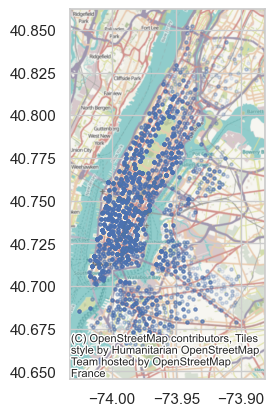

In [298]:
ax = trip_ends.sample(10000).plot(alpha=0.1, markersize=5, legend=True)
cx.add_basemap(ax, crs = trip_ends.crs)

3. Now that we have a GeoDataFrame to work with, we can evaluate spatial relationships.
In this problem, you will associate each Point geometry in both trip_starts and trip_ends
with the New York City Borough which contains it by performing a spatial join. This type
of operation is commonly referred to as ‘Point in Polygon’.

a) You can find a GeoJSON file containing the New York City five boroughs at:
info615/data/nyc_boros.geojson. Read this file into a GeoDataFrame called boros.
View the contents of boros.

In [299]:
boros = gpd.read_file('data/nyc_boros.geojson')

In [300]:
boros[['BoroName', 'geometry']]

,BoroName,geometry
0,Staten Island,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,Bronx,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
2,Queens,"MULTIPOLYGON (((1032452.015 154469.237, 103245..."
3,Manhattan,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,Brooklyn,"MULTIPOLYGON (((1022227.32 152028.146, 1022078..."


In [301]:
boros.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

b) Check what CRS boros is in. In order to perform a spatial join, the CRS needs to be
consistent with the CRS that we set for trip_starts and trip_ends. Is it? If not,
project boros to CRS= 4326 using to_crs().

In [302]:
boros = boros.to_crs(4326)
boros.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [303]:
boros[['BoroName', 'geometry']]

,BoroName,geometry
0,Staten Island,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,Bronx,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,Queens,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
3,Manhattan,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,Brooklyn,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."


In [304]:
boros.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

c) Make a plot of boros. Set facecolor='none', edgecolor='black', linewidth=2.
Plot a sample of 10,000 trip_starts as a second layer in the same plot on top of
boros. Visually, which Borough appears to contain the most trip starts?

In [305]:
trip_starts_sample = trip_starts.sample(10000)

/var/folders/d7/s9v4vr012y797bmw4ryrcfgc0000gn/T/ipykernel_19787/2513798227.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


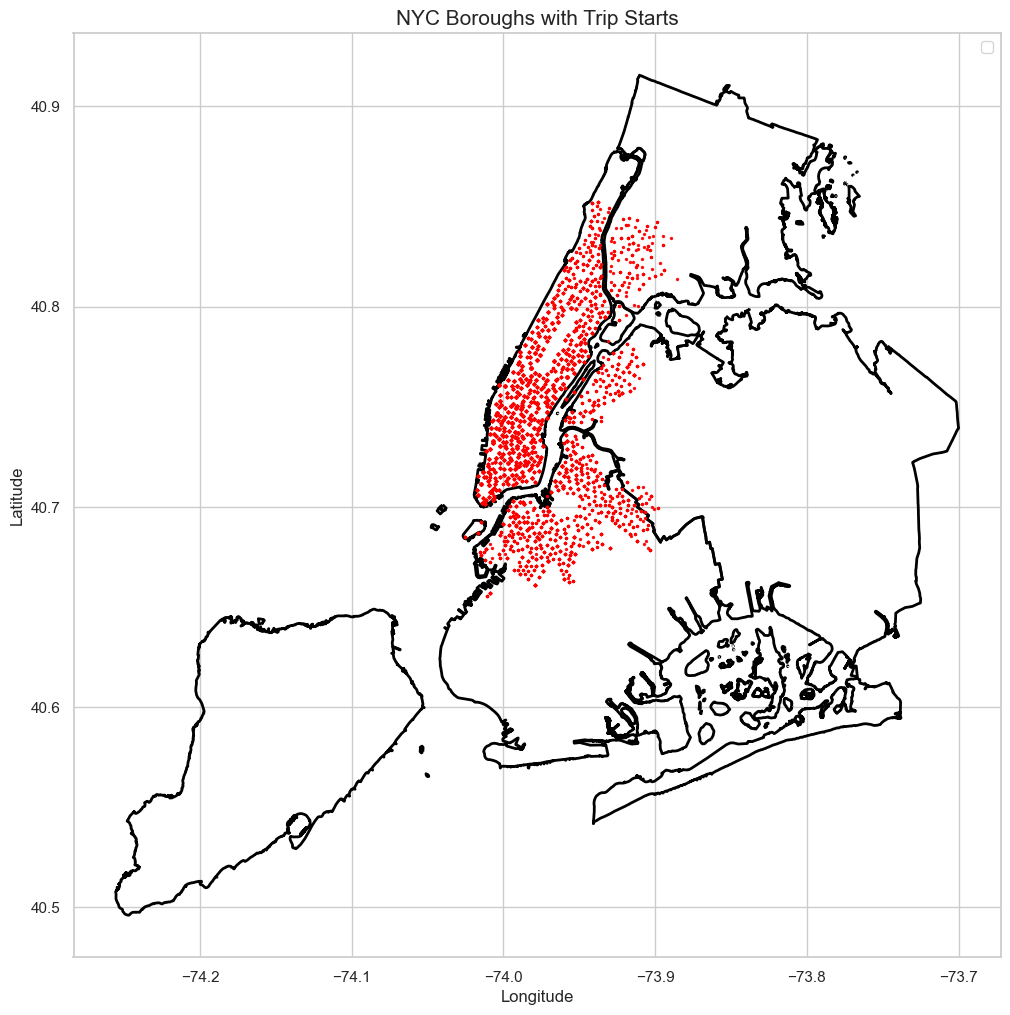

In [306]:
fig, ax = plt.subplots(figsize=(12, 12))

boros.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=2)

trip_starts_sample.plot(ax=ax, color='red', markersize=2, alpha=0.9)

plt.title("NYC Boroughs with Trip Starts", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend()

plt.show()

In [307]:
# Manhattan has the most trip starts, especially midtown. 

d) Create a new variable called trip_starts_joined and set it equal to the result of
a spatial join with trip_starts on ‘the left’ and boros on ‘the right’. This should
be a left join, since we want to ensure that we keep all of the rows from the left
table. The join should use the spatial predicate ‘within’, since we are asking ‘is this
Point within that Polygon?’ Thus, when performing the join, set how='left' and
predicate='within'.

In [308]:
trip_starts_joined = gpd.sjoin(trip_starts[['tripduration_minutes','distance_miles'
                                            ,'geometry','starttime_hour','start station id']], 
                    boros[['BoroName', 'geometry']],
                    how="left", predicate='within')

e) You should now see a boro_name column in trip_starts_joined. Make a histogram
showing the percentage of trip starts by Borough. Approximately what percentage of
trips start in Manhattan?

In [38]:
trip_starts_joined

,tripduration_minutes,geometry,index_right,BoroName
0,21.816667,POINT (-73.9721 40.76303),3,Manhattan
1,25.883333,POINT (-73.96764 40.75529),3,Manhattan
2,7.283333,POINT (-73.95242 40.71924),4,Brooklyn
3,24.833333,POINT (-73.93318 40.70106),4,Brooklyn
4,19.633333,POINT (-73.97855 40.67958),4,Brooklyn
...,...,...,...,...
499995,107.233333,POINT (-73.95939 40.78307),3,Manhattan
499996,4.950000,POINT (-73.98918 40.7636),3,Manhattan
499997,25.250000,POINT (-73.99431 40.73544),3,Manhattan
499998,13.200000,POINT (-73.94682 40.77246),3,Manhattan


<Axes: xlabel='Percent', ylabel='BoroName'>

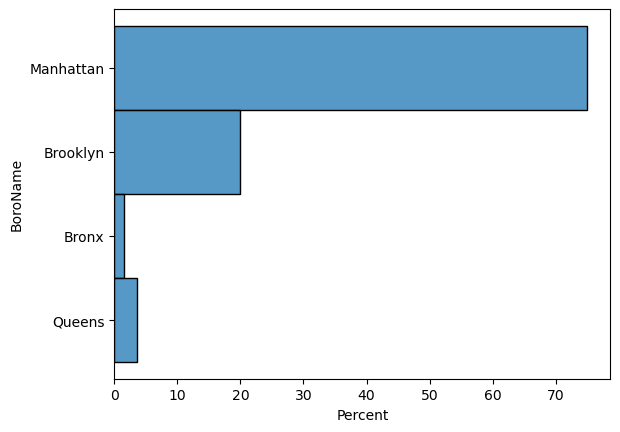

In [39]:
sns.histplot(data=trip_starts_joined, y='BoroName', stat='percent')

In [29]:
# Over 70% of trips start in Manhattan!

f) Perform the same spatial join as you did in 3d), but this time join trip_ends to boros
(rather than trip starts). Make a histogram showing the percentage of trip ends by
Borough. Approximately what percentage of trips end in Manhattan?

In [125]:
trip_ends_joined = gpd.sjoin(trip_ends[['tripduration_minutes','distance_miles',
                                        'geometry', 'starttime_hour']], 
                    boros[['BoroName', 'geometry']],
                    how="left", predicate='within')

<Axes: xlabel='Percent', ylabel='BoroName'>

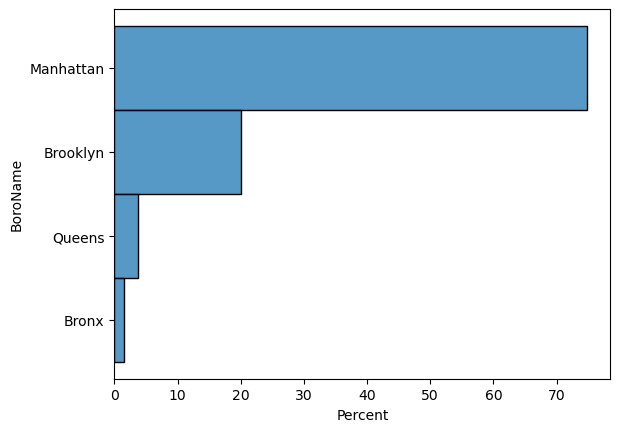

In [41]:
sns.histplot(data=trip_ends_joined, y='BoroName', stat='percent')

In [42]:
# Still about 75%. 

g) What is the median trip duration, grouped by Borough (of trip start location)?

In [56]:
trip_starts_joined.groupby('BoroName')['tripduration_minutes'].median()

BoroName
Bronx        15.216667
Brooklyn     13.850000
Manhattan    13.033333
Queens       12.566667
Name: tripduration_minutes, dtype: float64

h) What is the median Geodesic trip distance, grouped by Borough (of trip start location)?

In [63]:
trip_starts_joined.groupby('BoroName')['distance_miles'].median()

#By miles.

BoroName
Bronx        0.759988
Brooklyn     1.104611
Manhattan    1.058063
Queens       0.935704
Name: distance_miles, dtype: float64

In [66]:
trip_starts_median = trip_starts_joined.groupby('BoroName')[['distance_miles', 'tripduration_minutes']].median()

i) Make a scatter plot to compare trip duration and distance by Borough. Each dot in
this scatter plot should correspond to a single Borough, with median trip duration on
the y-axis and median trip distance on the x-axis. Would you categorize any of the
Boroughs as being a possible outlier in this scatter plot? Why?

<Axes: xlabel='distance_miles', ylabel='tripduration_minutes'>

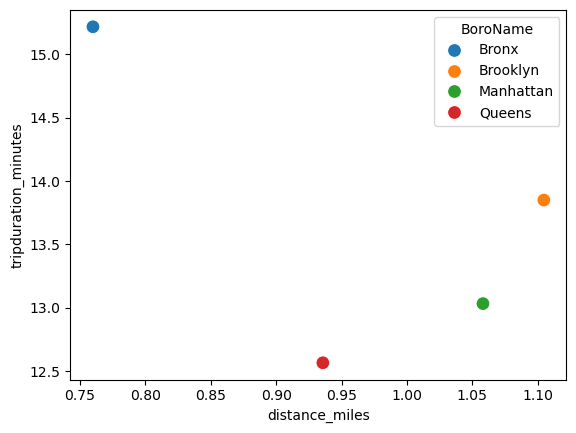

In [68]:
sns.scatterplot(data=trip_starts_median, x='distance_miles', y='tripduration_minutes', hue='BoroName', s=100)

In [69]:
# The Bronx seems like an outlier since it has by far the lowest median distance 
# yet the highest median trip duration.

4. In this problem, you will explore the relationship between distance and trip duration
through correlation analysis (as you did in Assignment 4). This time, you will explore how
this relationship compares across Boroughs. 

a) Calculate the monotonic correlation coefficient (i.e. Spearman’s ρ statistic) between
trip duration and distance, considering the entire dataset of trips.

In [77]:
df[['distance_miles', 'tripduration_minutes']].corr(method='spearman')

,distance_miles,tripduration_minutes
distance_miles,1.00000,0.61076
tripduration_minutes,0.61076,1.00000


b) Calculate Spearman’s ρ between trip duration and distance grouped by Borough (of
trip start). Make a simple bar plot showing this value for each Borough. Does any
Borough stand out as having either relatively high or relatively low correlation between
distance and duration?

In [82]:
corr_boro = trip_starts_joined.groupby('BoroName')[['distance_miles', 'tripduration_minutes']].corr(method='spearman')
corr_boro

distance_miles  tripduration_minutes
BoroName                                                            
Bronx     distance_miles              1.000000              0.199395
          tripduration_minutes        0.199395              1.000000
Brooklyn  distance_miles              1.000000              0.623676
          tripduration_minutes        0.623676              1.000000
Manhattan distance_miles              1.000000              0.620295
          tripduration_minutes        0.620295              1.000000
Queens    distance_miles              1.000000              0.560322
          tripduration_minutes        0.560322              1.000000

In [110]:
correlation_values = corr_boro.unstack().loc[:, ('distance_miles', 'tripduration_minutes')]
correlation_values = correlation_values.reset_index(name='correlation')

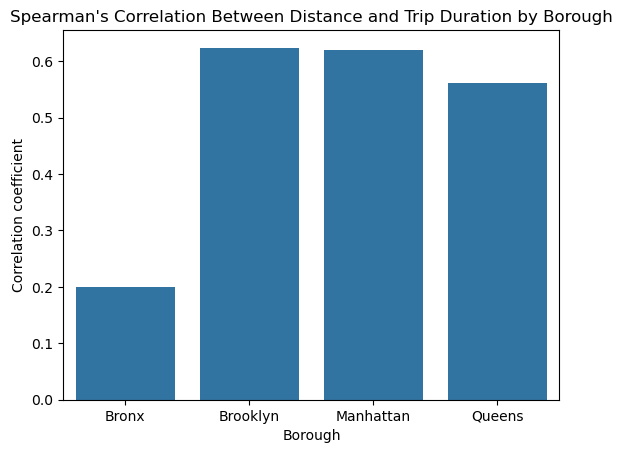

In [88]:
sns.barplot(data=correlation_values, x='BoroName', y='correlation')

plt.xlabel('Borough')
plt.ylabel("Correlation coefficient")
plt.title("Spearman's Correlation Between Distance and Trip Duration by Borough")

plt.show()

In [107]:
# The Bronx has an exceptionally low correlation. 

c) Calculate Spearman’s ρ between trip duration and distance grouped by Borough (of
trip start) and also by starttime_hour. The result should be 24 separate Spearman’s
ρ statistics for each Borough (so 96 coefficients in total, since there are four Boroughs
which have access to Citi Bike).

In [112]:
trip_starts_corr = trip_starts_joined[['BoroName', 'distance_miles', 'tripduration_minutes', 'starttime_hour']]

In [127]:
trip_ends_corr = trip_ends_joined[['BoroName', 'distance_miles', 'tripduration_minutes', 'starttime_hour']]

In [117]:
corr_boro_hour = trip_starts_joined.groupby(['BoroName', 'starttime_hour'])[['distance_miles', 'tripduration_minutes']].corr(method='spearman')

print(corr_boro_hour)

                                              distance_miles  \
BoroName starttime_hour                                        
Bronx    0              distance_miles              1.000000   
                        tripduration_minutes       -0.035964   
         1              distance_miles              1.000000   
                        tripduration_minutes       -0.008568   
         2              distance_miles              1.000000   
...                                                      ...   
Queens   21             tripduration_minutes        0.413654   
         22             distance_miles              1.000000   
                        tripduration_minutes        0.402583   
         23             distance_miles              1.000000   
                        tripduration_minutes        0.408492   

                                              tripduration_minutes  
BoroName starttime_hour                                             
Bronx    0              dista

In [128]:
corr_boro_hour_ends = trip_ends_joined.groupby(['BoroName', 'starttime_hour'])[['distance_miles', 'tripduration_minutes']].corr(method='spearman')

d) Make a line plot to visualize your results from 4c), with the correlation coefficient on
the y-axis, starttime_hour on the x-axis, and hue='boro_name' so that each Borough
receives its own line and color. Do any Boroughs in this plot stand out as being very
different from the others? Can you think of any potential causes which might explain
this?

In [118]:
corr_boro_hour_unstacked = corr_boro_hour.unstack()

correlation_data = corr_boro_hour_unstacked.loc[:, ('distance_miles', 'tripduration_minutes')]

correlation_data = correlation_data.reset_index()

correlation_data.columns = ['BoroName', 'starttime_hour', 'correlation_coefficient']

print(correlation_data)

   BoroName  starttime_hour  correlation_coefficient
0     Bronx               0                -0.035964
1     Bronx               1                -0.008568
2     Bronx               2                -0.063106
3     Bronx               3                 0.560987
4     Bronx               4                 0.604780
..      ...             ...                      ...
91   Queens              19                 0.542190
92   Queens              20                 0.439002
93   Queens              21                 0.413654
94   Queens              22                 0.402583
95   Queens              23                 0.408492

[96 rows x 3 columns]


In [129]:
corr_boro_hour__ends_unstacked = corr_boro_hour_ends.unstack()

correlation_data_ends = corr_boro_hour__ends_unstacked.loc[:, ('distance_miles', 'tripduration_minutes')]

correlation_data_ends = correlation_data_ends.reset_index()

correlation_data_ends.columns = ['BoroName', 'starttime_hour', 'correlation_coefficient']

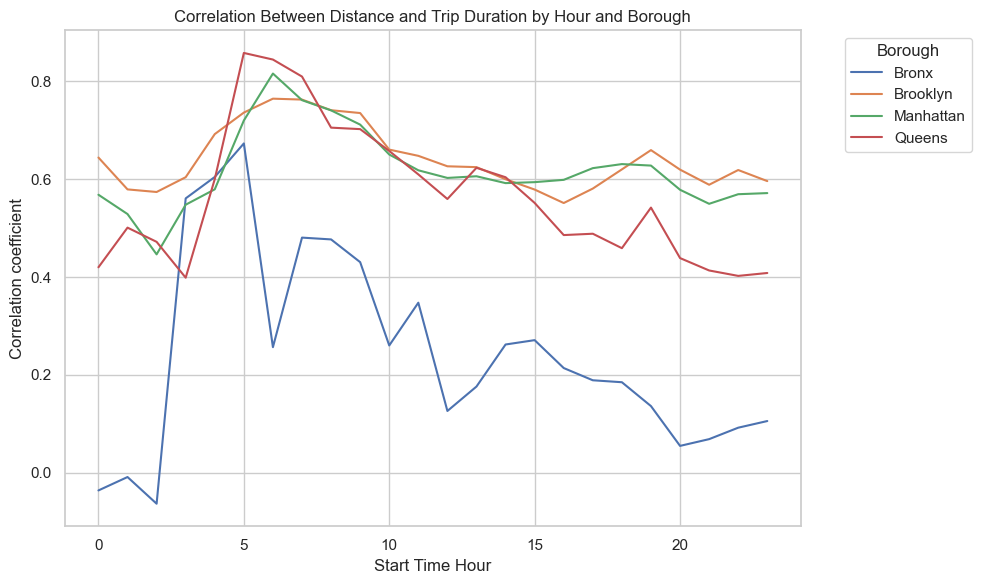

In [121]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=correlation_data,
    x='starttime_hour',
    y='correlation_coefficient',
    hue='BoroName'
)

plt.xlabel('Start Time Hour')
plt.ylabel("Correlation coefficient")
plt.title("Correlation Between Distance and Trip Duration by Hour and Borough")

plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [123]:
# Once again, the Bronx is the outlier here. 
# Considering the correlation is highest in the early mornings but then dips back down...
# the trips may be starting in the Bronx and ending in Manhattan for work. 
# But the rest of the trips are ending at the same station, making the distance zero. 

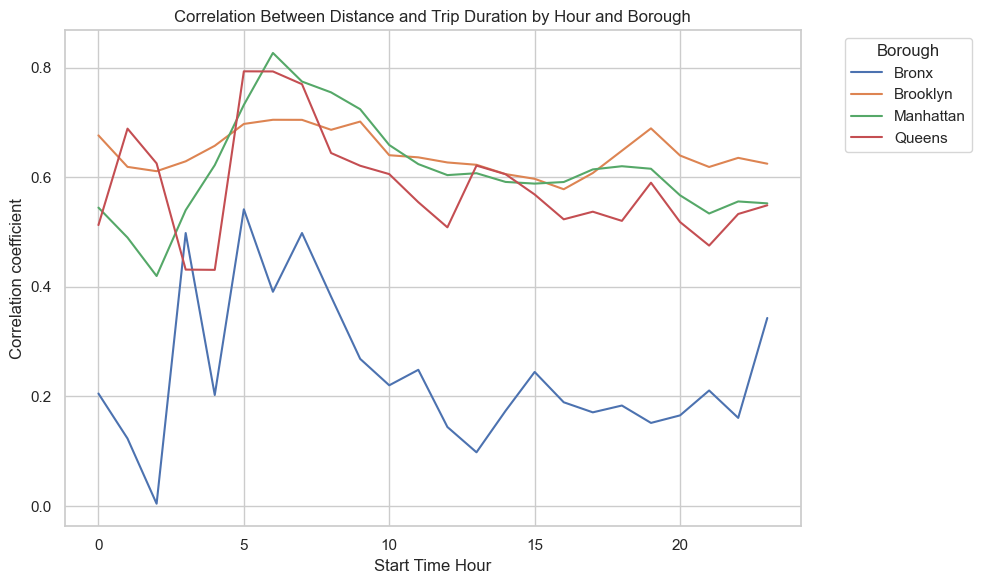

In [130]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=correlation_data_ends,
    x='starttime_hour',
    y='correlation_coefficient',
    hue='BoroName'
)

plt.xlabel('Start Time Hour')
plt.ylabel("Correlation coefficient")
plt.title("Correlation Between Distance and Trip Duration by Hour and Borough")

plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [131]:
# Plotting for trip ends somewhat confirms this there is an uptick in correlation...
# in the evening, when people are returning from work. 

5. In this problem, you will practice performing geometric manipulations on spatial data.
When performing operations which require you to consider distance or area in real-world
areal units, such as meters or square miles, be sure to use an equal-area map projection with
appropriate units, such as the Equal-Area Scalable Earth Grid (EPSG: 6933).

a) Calculate the total area of each Borough in square meters.

In [255]:
boros_equal = gpd.read_file('data/nyc_boros.geojson')
boros_equal = boros_equal[boros_equal['BoroName'] != 'Staten Island']
boros_equal = boros_equal.reset_index(drop=True)
boros_equal[['BoroName', 'geometry']]

,BoroName,geometry
0,Bronx,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
1,Queens,"MULTIPOLYGON (((1032452.015 154469.237, 103245..."
2,Manhattan,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
3,Brooklyn,"MULTIPOLYGON (((1022227.32 152028.146, 1022078..."


In [256]:
boros_equal = boros_equal.to_crs(6933)
boros_equal.crs

<Projected CRS: EPSG:6933>
Name: WGS 84 / NSIDC EASE-Grid 2.0 Global
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 86°S and 86°N.
- bounds: (-180.0, -86.0, 180.0, 86.0)
Coordinate Operation:
- name: US NSIDC EASE-Grid 2.0 Global
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [257]:
boros_equal['area_sq_meters'] = boros_equal.geometry.area
print(boros_equal[['BoroName', 'area_sq_meters']])

    BoroName  area_sq_meters
0      Bronx    1.102938e+08
1     Queens    2.825585e+08
2  Manhattan    5.914702e+07
3   Brooklyn    1.796873e+08


b) Calculate the total area of each Borough in square miles by converting your result from
5a from square meters to square miles.

In [258]:
boros_equal['area_sq_miles'] = boros_equal['area_sq_meters'] / 2.59e+6
print(boros_equal[['BoroName', 'area_sq_miles']])

    BoroName  area_sq_miles
0      Bronx      42.584477
1     Queens     109.095957
2  Manhattan      22.836686
3   Brooklyn      69.377332


c) Create a convex hull around trip_starts.

In [259]:
starts_equal = trip_starts.to_crs(6933)
starts_equal.crs

<Projected CRS: EPSG:6933>
Name: WGS 84 / NSIDC EASE-Grid 2.0 Global
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 86°S and 86°N.
- bounds: (-180.0, -86.0, 180.0, 86.0)
Coordinate Operation:
- name: US NSIDC EASE-Grid 2.0 Global
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [260]:
convex_hull = starts_equal[['geometry']].dissolve().convex_hull

In [261]:
convex_hull = gpd.GeoDataFrame(geometry=convex_hull)

d) Make a simple map displaying all three layers simultaneously: 1) trip_starts, 2) the
convex hull, and 3) boros.

/var/folders/d7/s9v4vr012y797bmw4ryrcfgc0000gn/T/ipykernel_19787/2105350870.py:13: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/d7/s9v4vr012y797bmw4ryrcfgc0000gn/T/ipykernel_19787/2105350870.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


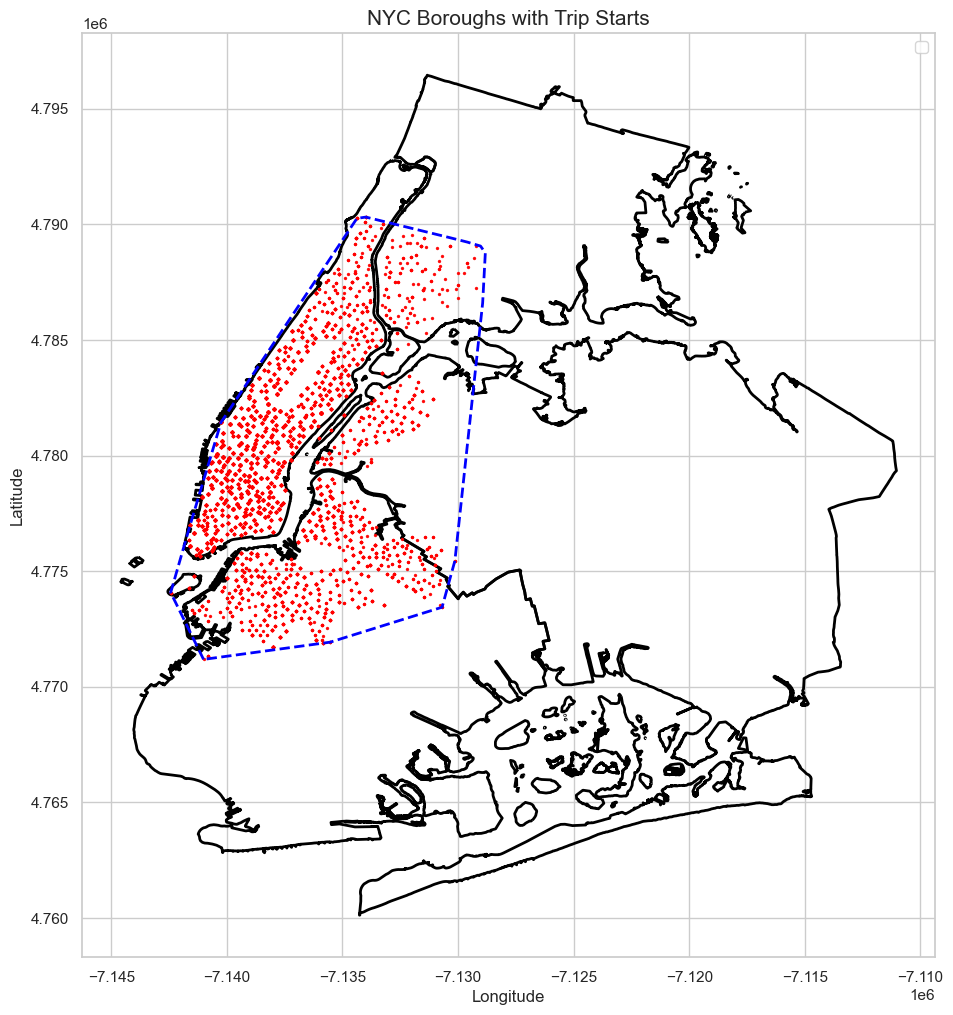

In [262]:
fig, ax = plt.subplots(figsize=(12, 12))

boros_equal.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=2)

starts_equal.sample(10000).plot(ax=ax, color='red', markersize=2, alpha=0.9)

convex_hull.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2, linestyle='--', label='Convex Hull')

plt.title("NYC Boroughs with Trip Starts", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend()

plt.show()

e) Create a GeoDataFrame called boros_clipped by clipping boros to the convex hull
using overlay(). The result should be a GeoDataFrame containing four Boroughs and
the region of each Borough which intersects with the convex hull.

In [263]:
boros_clipped = gpd.overlay(boros_equal, convex_hull, how='intersection')
boros_clipped

,BoroCode,BoroName,area_sq_meters,area_sq_miles,geometry
0,2,Bronx,1.102938e+08,42.584477,"MULTIPOLYGON (((-7130040.726 4784820.093, -713..."
1,4,Queens,2.825585e+08,109.095957,"MULTIPOLYGON (((-7130448.186 4774344.882, -713..."
2,1,Manhattan,5.914702e+07,22.836686,"MULTIPOLYGON (((-7141136.061 4773956.694, -714..."
3,3,Brooklyn,1.796873e+08,69.377332,"MULTIPOLYGON (((-7135573.674 4779327.009, -713..."


f) Calculate the area in square miles of each row in boros_clipped.

In [264]:
boros_clipped['area_sq_meters'] = boros_clipped.geometry.area
boros_clipped['area_sq_miles'] = boros_clipped.geometry.area / 2.59e+6
print(boros_clipped[['BoroName', 'area_sq_miles']])

    BoroName  area_sq_miles
0      Bronx       7.297699
1     Queens      13.478287
2  Manhattan      20.619547
3   Brooklyn      19.054545


In [265]:
print(boros_equal[['BoroName', 'area_sq_miles']])

    BoroName  area_sq_miles
0      Bronx      42.584477
1     Queens     109.095957
2  Manhattan      22.836686
3   Brooklyn      69.377332


g) What percentage of each New York City Borough is served by Citi Bike? In other
words, divide your result from 4f) by your result from 4b). Which Borough has the
highest Citi Bike coverage? Which has the lowest?

In [268]:
boros_equal['bike_percentage'] = boros_clipped['area_sq_miles'] / boros_equal['area_sq_miles']
print(boros_equal[['BoroName', 'bike_percentage']])

    BoroName  bike_percentage
0      Bronx         0.171370
1     Queens         0.123545
2  Manhattan         0.902913
3   Brooklyn         0.274651


In [197]:
# Manhattan has the highest density of city bikes, 
# while the Bronx has the lowest. 
# Staten Island would technically have the lowest but it doesn't even register...
# with the convex hull. 

h) In 4g) we used areal land coverage to evaluate the percentage of each Borough that is
served by Citi Bike. Can you think of an alternate, more meaningful metric to evaluate
Citi Bike coverage by Borough?

In [ ]:
# If we had the whole length of the trips mapped we could find how much area...
# they span across the boroughs. 
# This would represent how much people are traveling within a given borough rather than...
# just where they are starting. 

i) Calculate the density of trip starts by Borough, defined as the number of trip starts
per square mile, using the Borough regions that have been clipped to the convex hull.
In other words, the denominator should only include the area of each Borough which
is actually served by Citi Bike.

In [276]:
starts_count = trip_starts_joined.groupby('BoroName').size().reset_index(name='trip_count')

In [277]:
starts_count

,BoroName,trip_count
0,Bronx,7221
1,Brooklyn,99835
2,Manhattan,374736
3,Queens,18208


In [281]:
boros_clipped['area_sq_miles']

0     7.297699
1    13.478287
2    20.619547
3    19.054545
Name: area_sq_miles, dtype: float64

In [283]:
density_data['trip_starts_density'] = starts_count['trip_count'] / boros_clipped['area_sq_miles']
print(density_data[['BoroName','trip_starts_density']])

    BoroName  trip_starts_density
0      Bronx           989.489988
1     Queens          7407.098702
2  Manhattan         18173.823159
3   Brooklyn           955.572524


j) Calculate the number of unique Citi Bike Stations by Borough. This can be accomplished using the unique station identifiers contained in trip_starts (hint: you may
find .groupby().first() helpful here).

In [314]:
unique_stations = trip_starts_joined.groupby(['BoroName', 'start station id']).first()
unique_stations_count = unique_stations.groupby('BoroName').size().reset_index(name='unique_stations_count')
print(unique_stations_count)

    BoroName  unique_stations_count
0      Bronx                    158
1   Brooklyn                    356
2  Manhattan                    523
3     Queens                    104


k) Calculate the density of unique Citi Bike Stations by Borough, defined as the number
of unique stations per square mile, using the Borough regions that have been clipped
to the convex hull. In other words, the denominator should only include the area of
each Borough which is actually served by Citi Bike.

In [319]:
unique_stations_count['stations_count'] = unique_stations_count['unique_stations_count'] / boros_clipped['area_sq_miles']
print(unique_stations_count[['BoroName','stations_count']])

    BoroName  stations_count
0      Bronx       21.650660
1   Brooklyn       26.412853
2  Manhattan       25.364282
3     Queens        5.458015


l) Calculate the daily average number of trip starts per station by Borough. In other
words, divide the number of trip starts by the number of stations for each Borough,
and divide that metric by the number of days in the time period that we are considering
(i.e. the month of October has 31 days). Which Borough has the highest daily average
trips per station? Which has the lowest?

In [322]:
unique_stations_count['trip_avg'] = starts_count['trip_count'] / unique_stations_count['stations_count']
unique_stations_count['daily_avg'] = unique_stations_count['trip_avg'] / 31
print(unique_stations_count[['BoroName','daily_avg']])

    BoroName   daily_avg
0      Bronx   10.758817
1   Brooklyn  121.928666
2  Manhattan  476.585860
3     Queens  107.613264


In [ ]:
# Manhattan has the highest, while the Bronx has the lowest. 